# Decision Trees

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import pandas as pd

## 3. Implementing a Decision Tree

- To answer the questions posed in the previous exercise, we’re going to do things a bit differently in this lesson and work “backwards” (!!!): 
    - We’re going to first fit a decision tree to a dataset and visualize this tree using scikit-learn. 
    - We’re then going to systematically unpack the following: 
        - How to interpret the tree visualization, how scikit-learn‘s implementation works, what is gini impurity, what are parameters and hyper-parameters of the decision tree model, etc.
- We’re going to use a dataset about cars with six features:
    - The price of the car, `buying`, which can be “vhigh”, “high”, “med”, or “low”.
    - The cost of maintaining the car, `maint`, which can be “vhigh”, “high”, “med”, or “low”.
    - The number of doors, `doors`, which can be “2”, “3”, “4”, “5more”.
    - The number of people the car can hold, `persons`, which can be “2”, “4”, or “more”.
    - The size of the trunk, `lugboot`, which can be “small”, “med”, or “big”.
    - The safety rating of the car, `safety`, which can be “low”, “med”, or “high”.
- The question we will be trying to answer using decision trees is: when considering buying a car, what factors go into making that decision?

**Task 1**  
- We’ve imported the dataset.
    - Take a look at the first five rows of the dataset by uncommenting `print(df.head())` and clicking Run.
    - We’ve created dummy features for the categorical values and set the predictor and target variables as `X` and `y` respectively. Uncomment the lines pertaining to this and press Run.
    - You can examine the new set of features using `print(X.columns)`
- How many features are there now? Do they make sense?

<br>

**Task 2**  
- We can now perform a train-test split and fit a decision tree to our training data. 
- We’ll be using scikit-learn‘s `train_test_split` function to do the split and the `DecisionTreeClassifier()` class to fit the data. 
- Uncomment the lines that do the same.
- (Don’t worry about the input parameters to the tree classifier for the moment- we’ll get to them in a bit!)

<br>

**Task 3**  
- We’re now ready to visualize the decision tree! 
- The `tree` module within `scikit-learn` has a plotting functionality that allows us to do this. 
- Uncomment the lines relevant to this and press Run to view the tree visualization.

  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')
21


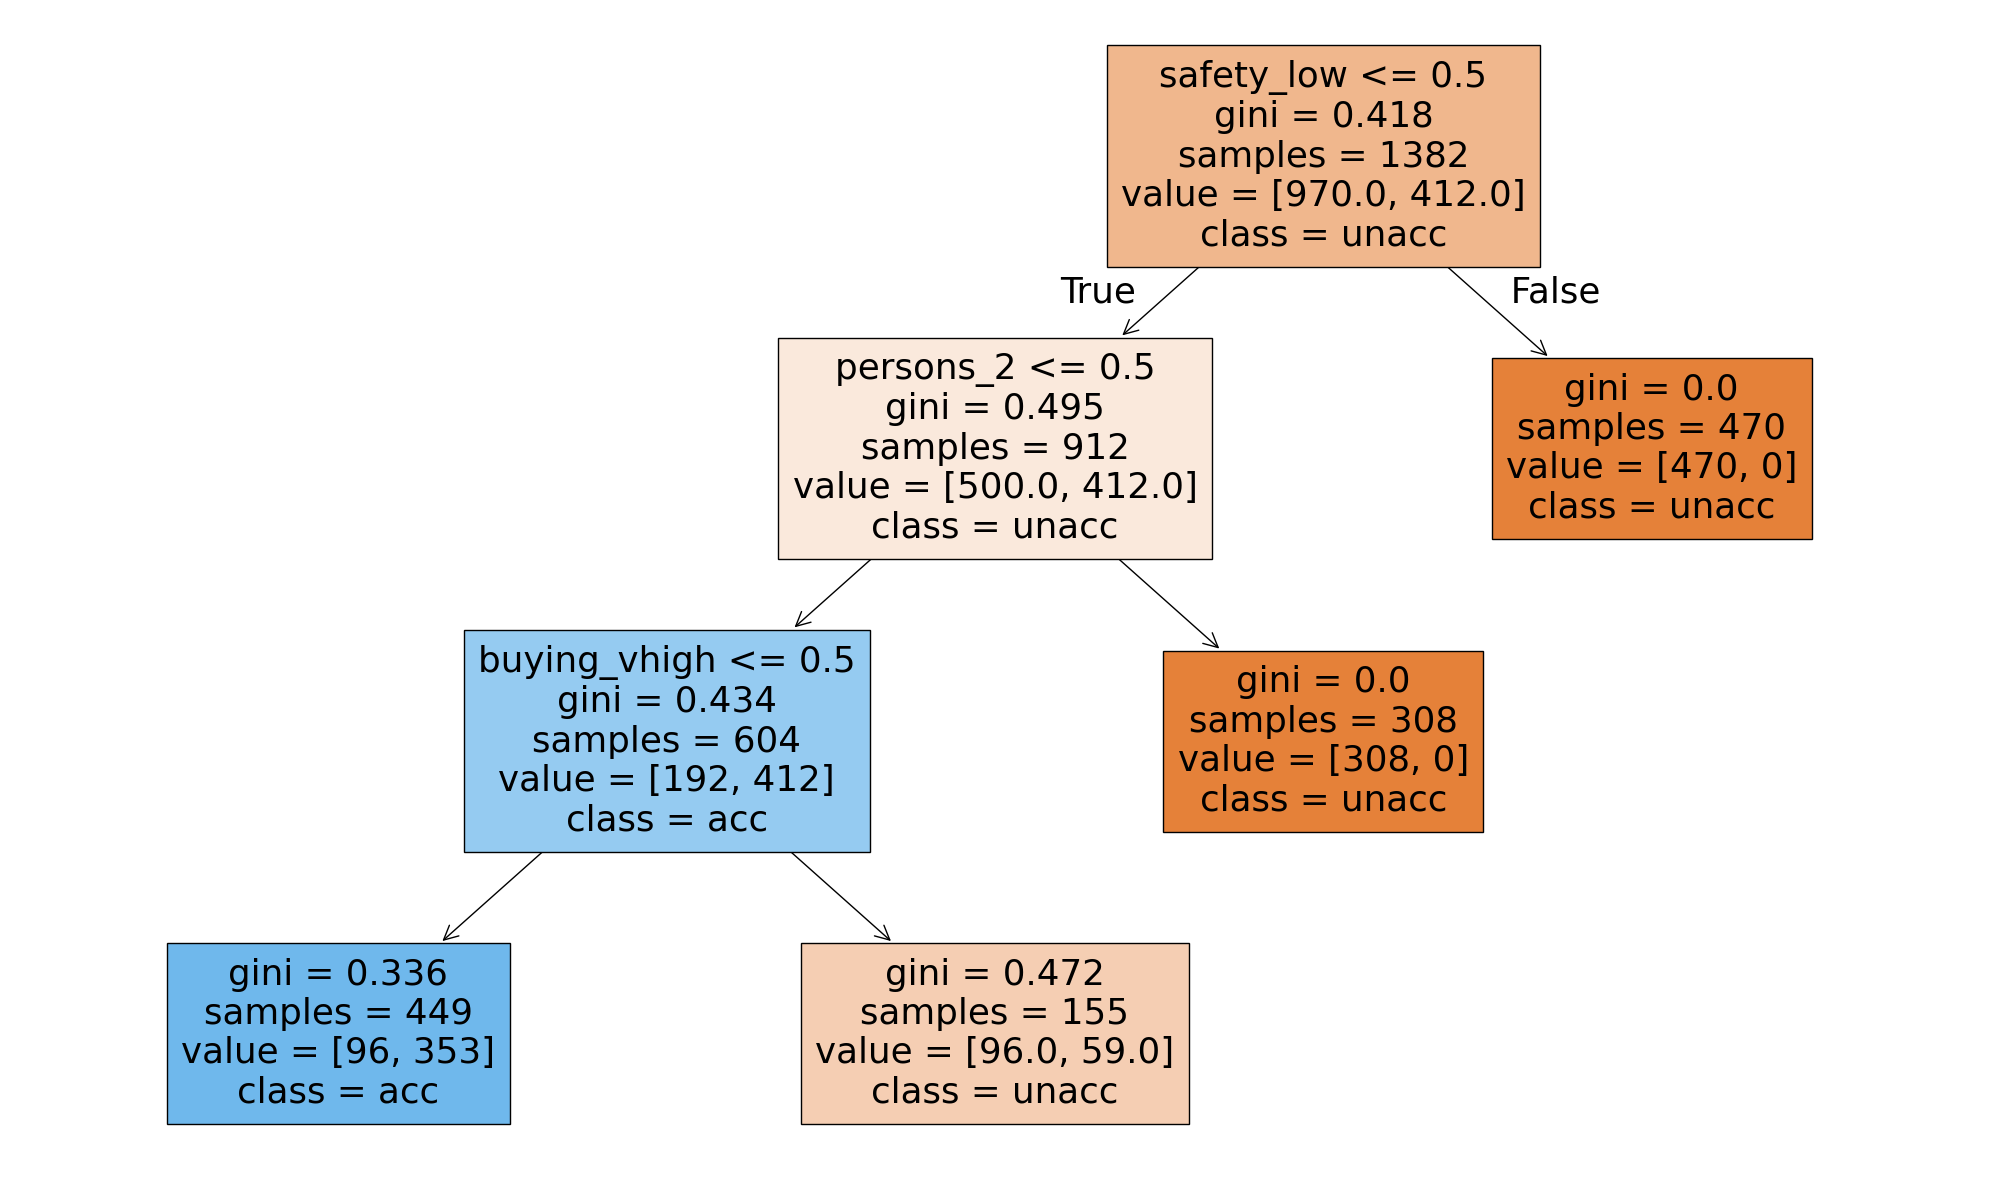

In [12]:
df = pd.read_csv('car.csv')

## 1a. Take a look at the dataset
print(df.head())

## 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## 1c. Examine the new features
print(X.columns)
print(len(X.columns))

## 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

## 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

## 4. Interpreting the Decision Tree

**Task 1**  
- The root node is identified as the top of the tree. 
- This is notated already with the number of samples and the numbers in each class (i.e. unacceptable vs. acceptable) that was used to build the tree. 
- We’ve created a variable `frac_acc` to print the fraction of acceptable cars the tree was trained on. 
- Calculate this from the root node of the tree.

<br>

**Task 2**  
- The first split occurs off the root node based on the boolean `safety_low <=0.5`. 
- As this is a dummy variable, a value of 1 indicates `safety='low'`, 0 indicates `safety<>'low'`. 
- Splits occur with True to the left, False to the right. 
- Note the right split is a `leaf node` (i.e. there are no more branches), so any decision ending here results in the majority class. 
- What is the predicted class of any vehicle with LOW safety?
- (We’ve created a variable `low_safety_class` to fill in the answer.)

<br>

**Task 3**  
- Identify the final outcome of the decision tree for the sample with `buying_vhigh=1`, `persons_2= 0`, `safety_low =0`. 
- We’ve defined a variable called `sample_class` to fill in the correct answer.

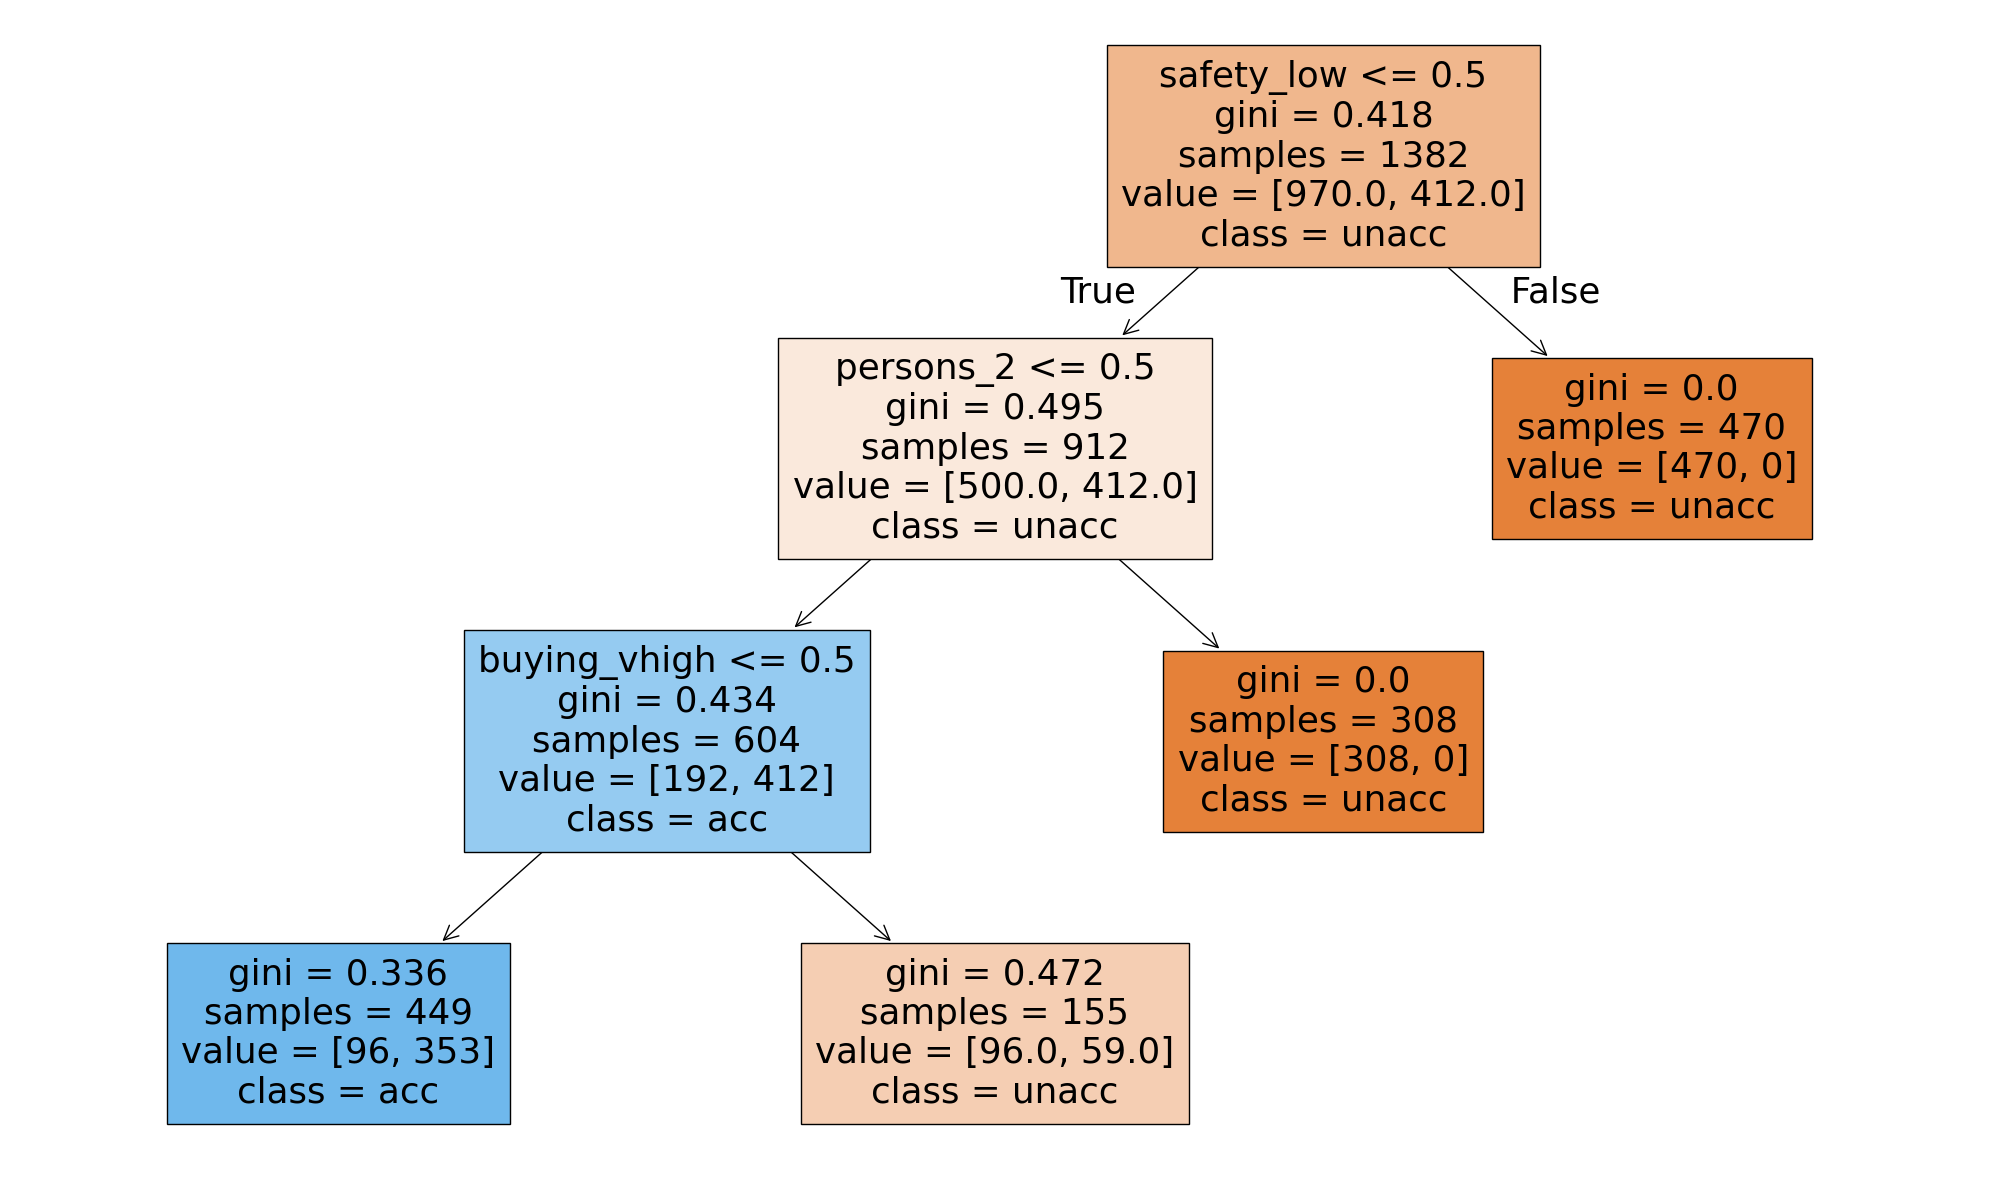

In [4]:
df = pd.read_csv('car.csv')

## 1a. Take a look at the dataset
# print(df.head())

## 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## 1c. Examine the new features
# print(X.columns)
# print(len(X.columns))

## 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

## 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [5]:
# Task 1
frac_acc = 412/1382
print(f'Fraction of acceptable cars: {frac_acc}')

# Task 2
low_safety_class = "unacc"
print(f'Cars with low safety: {low_safety_class}')

# Task 3
sample_class = "unacc"
print(f'The classs of the sample car: {sample_class}')

Fraction of acceptable cars: 0.2981186685962373
Cars with low safety: unacc
The classs of the sample car: unacc


## 5. Gini Impurity

**Task 1**  
- Using the same decision tree from the previous exercise, notice that each node is labeled with a `gini=`, which is the Gini impurity for the samples at that node. 
- For the root node, calculate the Gini impurity using the formula and confirm this matches the value listed on the node.

<br>

**Task 2**  
- Confirm the Gini impurity for the bottom left node. 
- Since this is a non-root node (either a leaf or a split node), the Gini impurity is only calculated for the samples passing through this node, not the entire dataset – **hence the number of samples is 449, NOT 1382**.


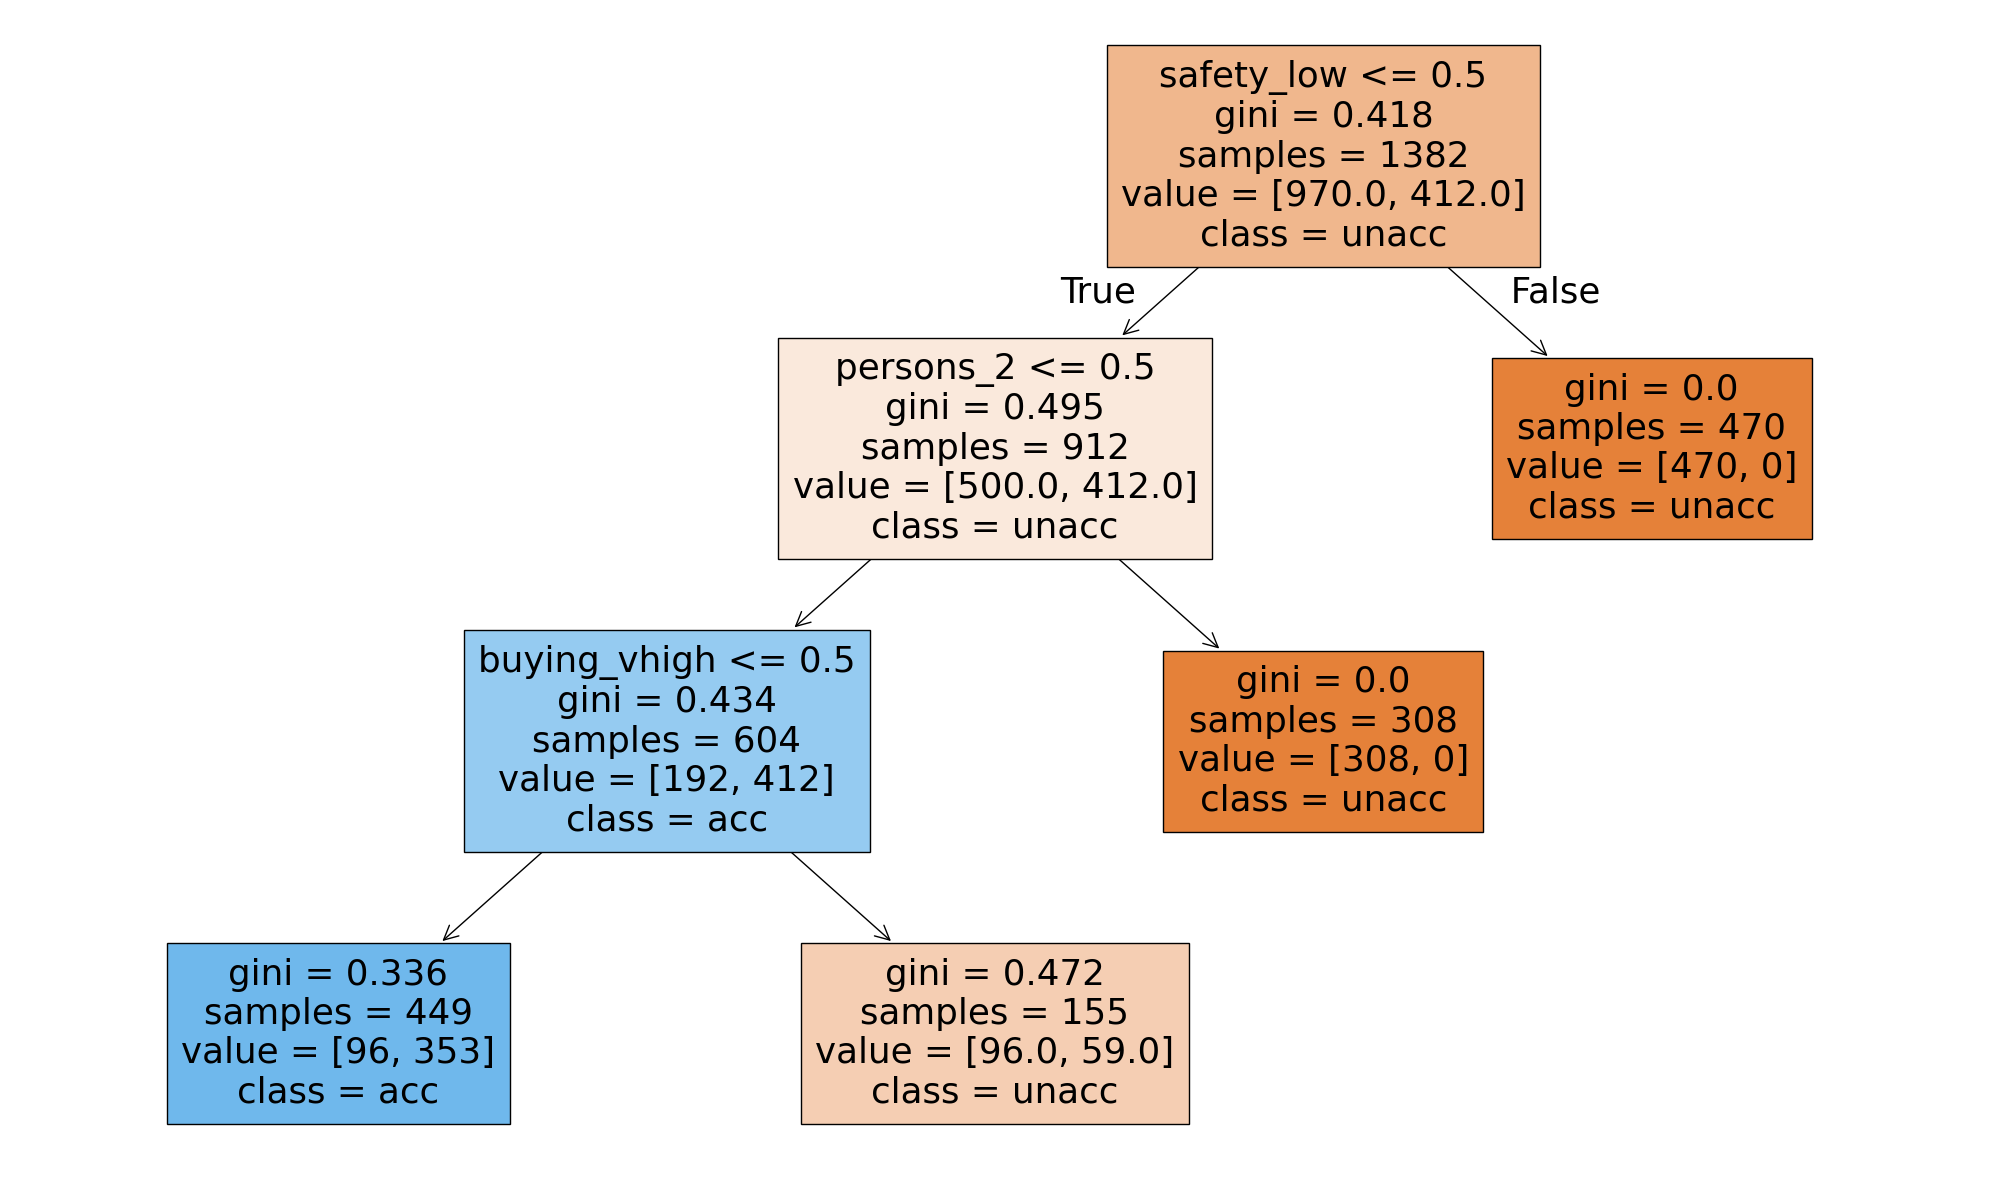

In [13]:
df = pd.read_csv('car.csv')

## 1a. Take a look at the dataset
# print(df.head())

## 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## 1c. Examine the new features
# print(X.columns)
# print(len(X.columns))

## 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

## 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [14]:
# Task 1
gini_root = 1 - ((970/1382)**2 + (412/1382)**2)
print(f'Gini impurity root node : {gini_root}')

# Task 2
gini_bottom_left = 1 - ((96/449)**2 + (353/449)**2)
print(f'Gini impurity bottom left node : {gini_bottom_left}')

Gini impurity root node : 0.41848785606128835
Gini impurity bottom left node : 0.33618880858725886


## 6. Information Gain

**Task 1**  
- Verify splitting on a pure node will result in an information gain of zero. 
- For example, with the right-hand-side split of the root node, `safety_low<=0.5` is false, consider a further split of this node.
- The result will be each subsequent split will still have Gini impurity of zero. 
- Fill this in the code editor and uncomment the relevant lines to calculate the gini information gain.

<br>

**Task 2**  
- Calculate the information gain on the next split, on `persons_2` in the tree but reading the following:
    - The number of samples of the tree to input the split ratio (`r_persons_2`)
    - The initial gini value at the parent node `persons_2`(`initial_gini_persons_2`)
    - The gini values at the child nodes (`gini_left_node` and `gini_right_node`) Input these, uncomment the relevant lines of code and press Run to obtain the information gain at this split.

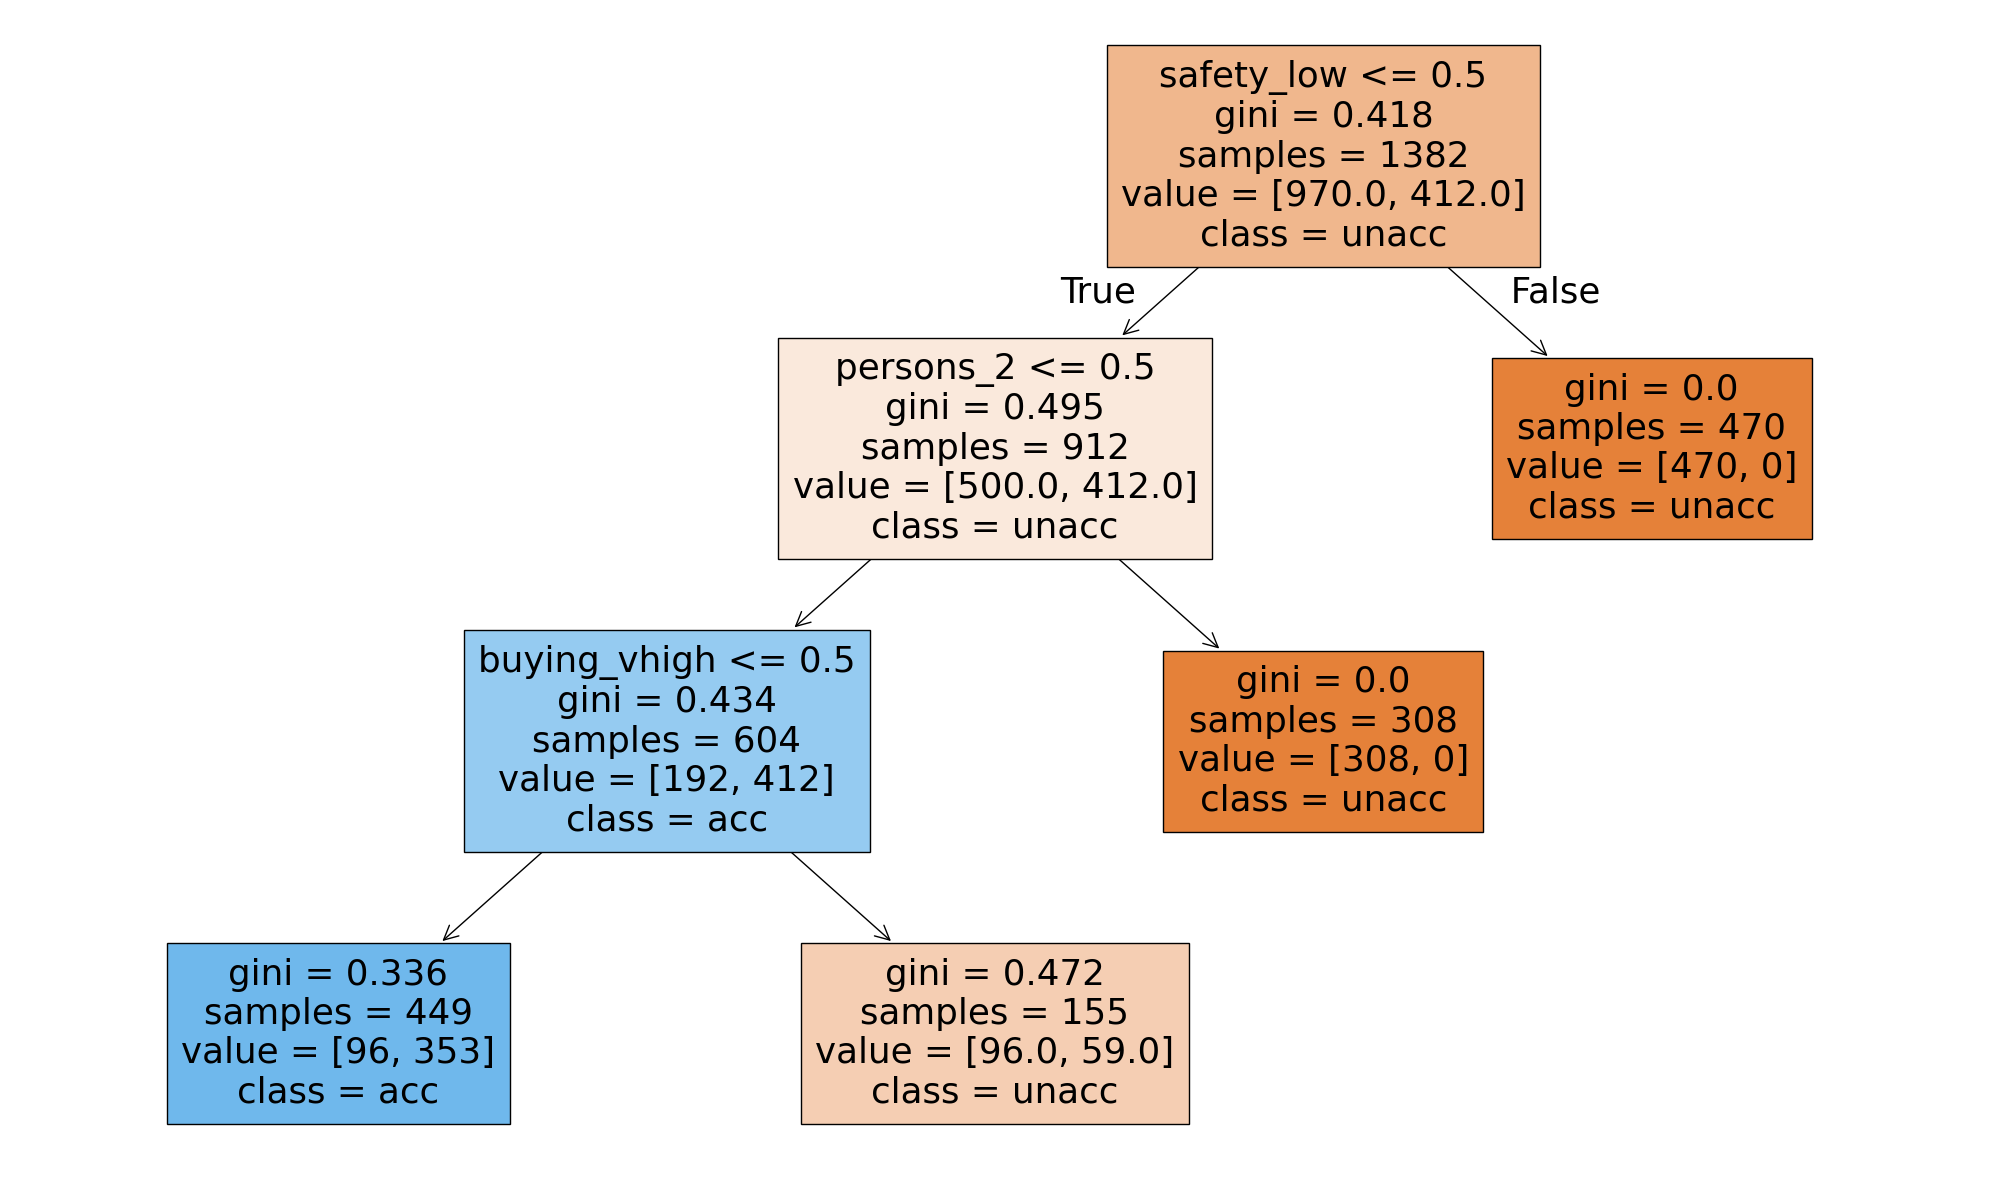

In [15]:
df = pd.read_csv('car.csv')

## 1a. Take a look at the dataset
# print(df.head())

## 1b. Setting the target and predictor variables
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## 1c. Examine the new features
# print(X.columns)
# print(len(X.columns))

## 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

## 3.Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=5, class_names = ['unacc', 'acc'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [16]:
#1. Information gain at a pure node (i.e., node with no more branches!)
# Simulating a pure node split. A pure node has only one class, so the information gain should be 0
r = 0.5 # ratio of new split, could be anything
gini_pure_node = .0
gini_info_gain = r*gini_pure_node  + (1-r)*gini_pure_node 
print(f'Gini information gain pure node split safety_low >= .5 : {gini_info_gain}')

#2. Information gain at the 'persons_2' split
r_persons_2 = 604/912 # read ratio of the split from the tree!
gini_left_split = .434
gini_right_split = .0
initial_gini_persons_2 = .495

weighted_gini_persons_2 = r_persons_2*gini_left_split + (1-r_persons_2)*gini_right_split
gini_info_gain_persons_2 = initial_gini_persons_2 - weighted_gini_persons_2

print(f'Gini information gain node persons_2 : {gini_info_gain_persons_2}')

Gini information gain pure node split safety_low >= .5 : 0.0
Gini information gain node persons_2 : 0.20757017543859652


In [24]:
wg = 0.434 * (604/912) + 0 * (308/912)
ig = 0.495 - wg
wg, ig

(0.2874298245614035, 0.20757017543859652)

## 7. How a Decision Tree is Built (Feature Split)

**Task 1**  
- Create two DataFrames left and right that represent the `y_train` values that correspond to `x_train['persons_2']` being `0` and `1` respectively. 
- Calculate the length of these DataFrames, store them as `len_left` and `len_right`, and print them.

<br>

**Task 2**  
- We’re now going to calculate the gini impurities corresponding to the overall training data and the left and right split. 
- To do so:
    1- Uncomment the line pertaining to calculating the gini impurity in the overall training data.
    2. For the gini value of the left node, create a variable `gini_left` and use the `gini` function to calculate the value.
    3. For the gini value of the right node, create a variable `gini_right` and use the `gini` function to calculate the value.

<br>

**Task 3**  
- Before proceeding to calculate the information gain at this split, let’s consolidate what we’ve calculated in the previous checkpoints:
    - There are 917 cars with a `persons_2` value of 0 and 465 cars with `persons_2` value of 1.
    - The overall gini impurity of the training data is 0.4185. The gini impurity for the left split was 0.4949 and the gini impurity of the right split is 0.
- This means that the *weighted impurity* of this split is:
$$ \frac{917}{1382} \times 0.4949 + \frac{465}{1382} \times 0 = 0.3284 $$
- The information gain for tree whose root node is `persons_2` should be
$$ 0.4185 - 0.3284 = 0.0901 $$
- Use the `info_gain` function to calculate the information gain corresponding to this split and store it as `info_gain_persons_2`. 
- Print it to check if it is indeed the expected value!

<br>

**Task 4**  
- We’ve now verified that splitting at a root node of `persons_2` gives us a lesser information gain than splitting at `safety_low` (0.0901 in comparison to 0.0918!). 
- Verify the information gain is the highest at the root node using the function `info_gain` and looping through ALL the features. 
- Uncomment the lines that pertain to this calculation to verify if the tree we’ve been working with so far has the best possible root node!

In [26]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [34]:
#### -----------------------------------
## 1. Calculate sample sizes for a split on `persons_2`
left = y_train[x_train['persons_2']==0] # car can hold more than 2 persons
right = y_train[x_train['persons_2']==1] # car can hold 2 persons
len_left = len(left)
len_right = len(right)


print ('No. of cars with persons_2 == 0:', len_left)
print ('No. of cars with persons_2 == 1:', len_right)

## 2. Gini impurity calculations
gi = gini(y_train)
gini_left = gini(left)
gini_right = gini(right)

print('Original gini impurity (without splitting!):', gi)
print('Left split gini impurity:', gini_left)
print('Right split gini impurity:', gini_right)

## 3.Information gain when using feature `persons_2`
info_gain_persons_2 = info_gain(left, right, gi)

print(f'Information gain for persons_2:', info_gain_persons_2)

## 4. Which feature split maximizes information gain?
info_gain_list = []
for i in x_train.columns:
    left = y_train[x_train[i]==0]
    right = y_train[x_train[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')
print(info_gain_table)

No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465
Original gini impurity (without splitting!): 0.41848785606128835
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0
Information gain for persons_2: 0.09013468781461476
Greatest impurity gain at:0    safety_low
1      0.091603
Name: 19, dtype: object
                 0         1
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002021
0      buying_high  0.001094
4       maint_high  0.000530
10         doors_4  0.000423
16    lug_boot_med  0.000386
11     doors_5more  0.000325
9          doors_3  0.000036


## 8. How a Decision Tree is Built (Recursion)

**Task 1**  
- Update the variables `y_train_sub` and `x_train_sub` with a logical filter to represent the data at the left node after the root node split. 
- Note, this will include only data that has been split at the root node to the left, i.e. ‘safety_low<=.5’.

<br>

**Task 2**  
- Use the previously defined functions `gini` and loop for `info_gain_list` to verify the next split after ‘safety_low<=.5’ will be on `person_2`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [38]:
y_train_sub = y_train[x_train['safety_low']==0]
x_train_sub = x_train[x_train['safety_low']==0]

gi = gini(y_train_sub)
print(f'Gini impurity at root: {gi}')

info_gain_list = []
for i in x_train.columns:
    left = y_train_sub[x_train_sub[i]==0]
    right = y_train_sub[x_train_sub[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')

Gini impurity at root: 0.49534472145275465
Greatest impurity gain at:0    persons_2
1     0.208137
Name: 12, dtype: object


## 9. Train and Predict using `scikit-learn`

**Task 1**  
- Create a decision tree classification model defined as `dtree` with default parameters. 
- Print the parameters of the tree using `.get_params()` method.

<br>

**Task 2**  
- it `dtree` using the training data set and labels. 
- After the tree is fit, print the depth of the tree using `.get_depth()`.

<br>

**Task 3**  
- Predict the classes of the test data set (`x_test`) and save this as an array `y_pred`. 
- Print the accuracy of model on the test set (either using `.score()` or `accuracy_score()`).

In [43]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f'Decision Tree parameters: {dtree.get_params()}')

## 2. Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train, y_train)
print(f'Decision tree depth: {dtree.get_depth()}')

## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)
print(f'Test set accuracy: {dtree.score(x_test, y_test)}') # or accuracy_score(y_test, y_pred)

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9826589595375722


## 10. Visualizing Decision Trees

**Task 1**  
- Press Run on the existing code and inspect the current output of `tree.plot_tree()` (Use the arrows in the browser to zoom out for a closer view!). 
- What seems to be missing? 
- The features are labeled only by index rather than name. 
- Pass the additional parameters `feature_names = x_train.columns`, `class_names = ['unacc','acc'], filled=True` to the plotting function and note the differences.

<br>

**Task 2**  
- Maybe you want a more simplistic method of visualizing the tree in a text-based fashion. 
- This can be done by printing the result of `tree.export_text()`. 
- Fix the same issue as above by passing the parameter `feature_names` with a list of the columns to print out the names rather than index.

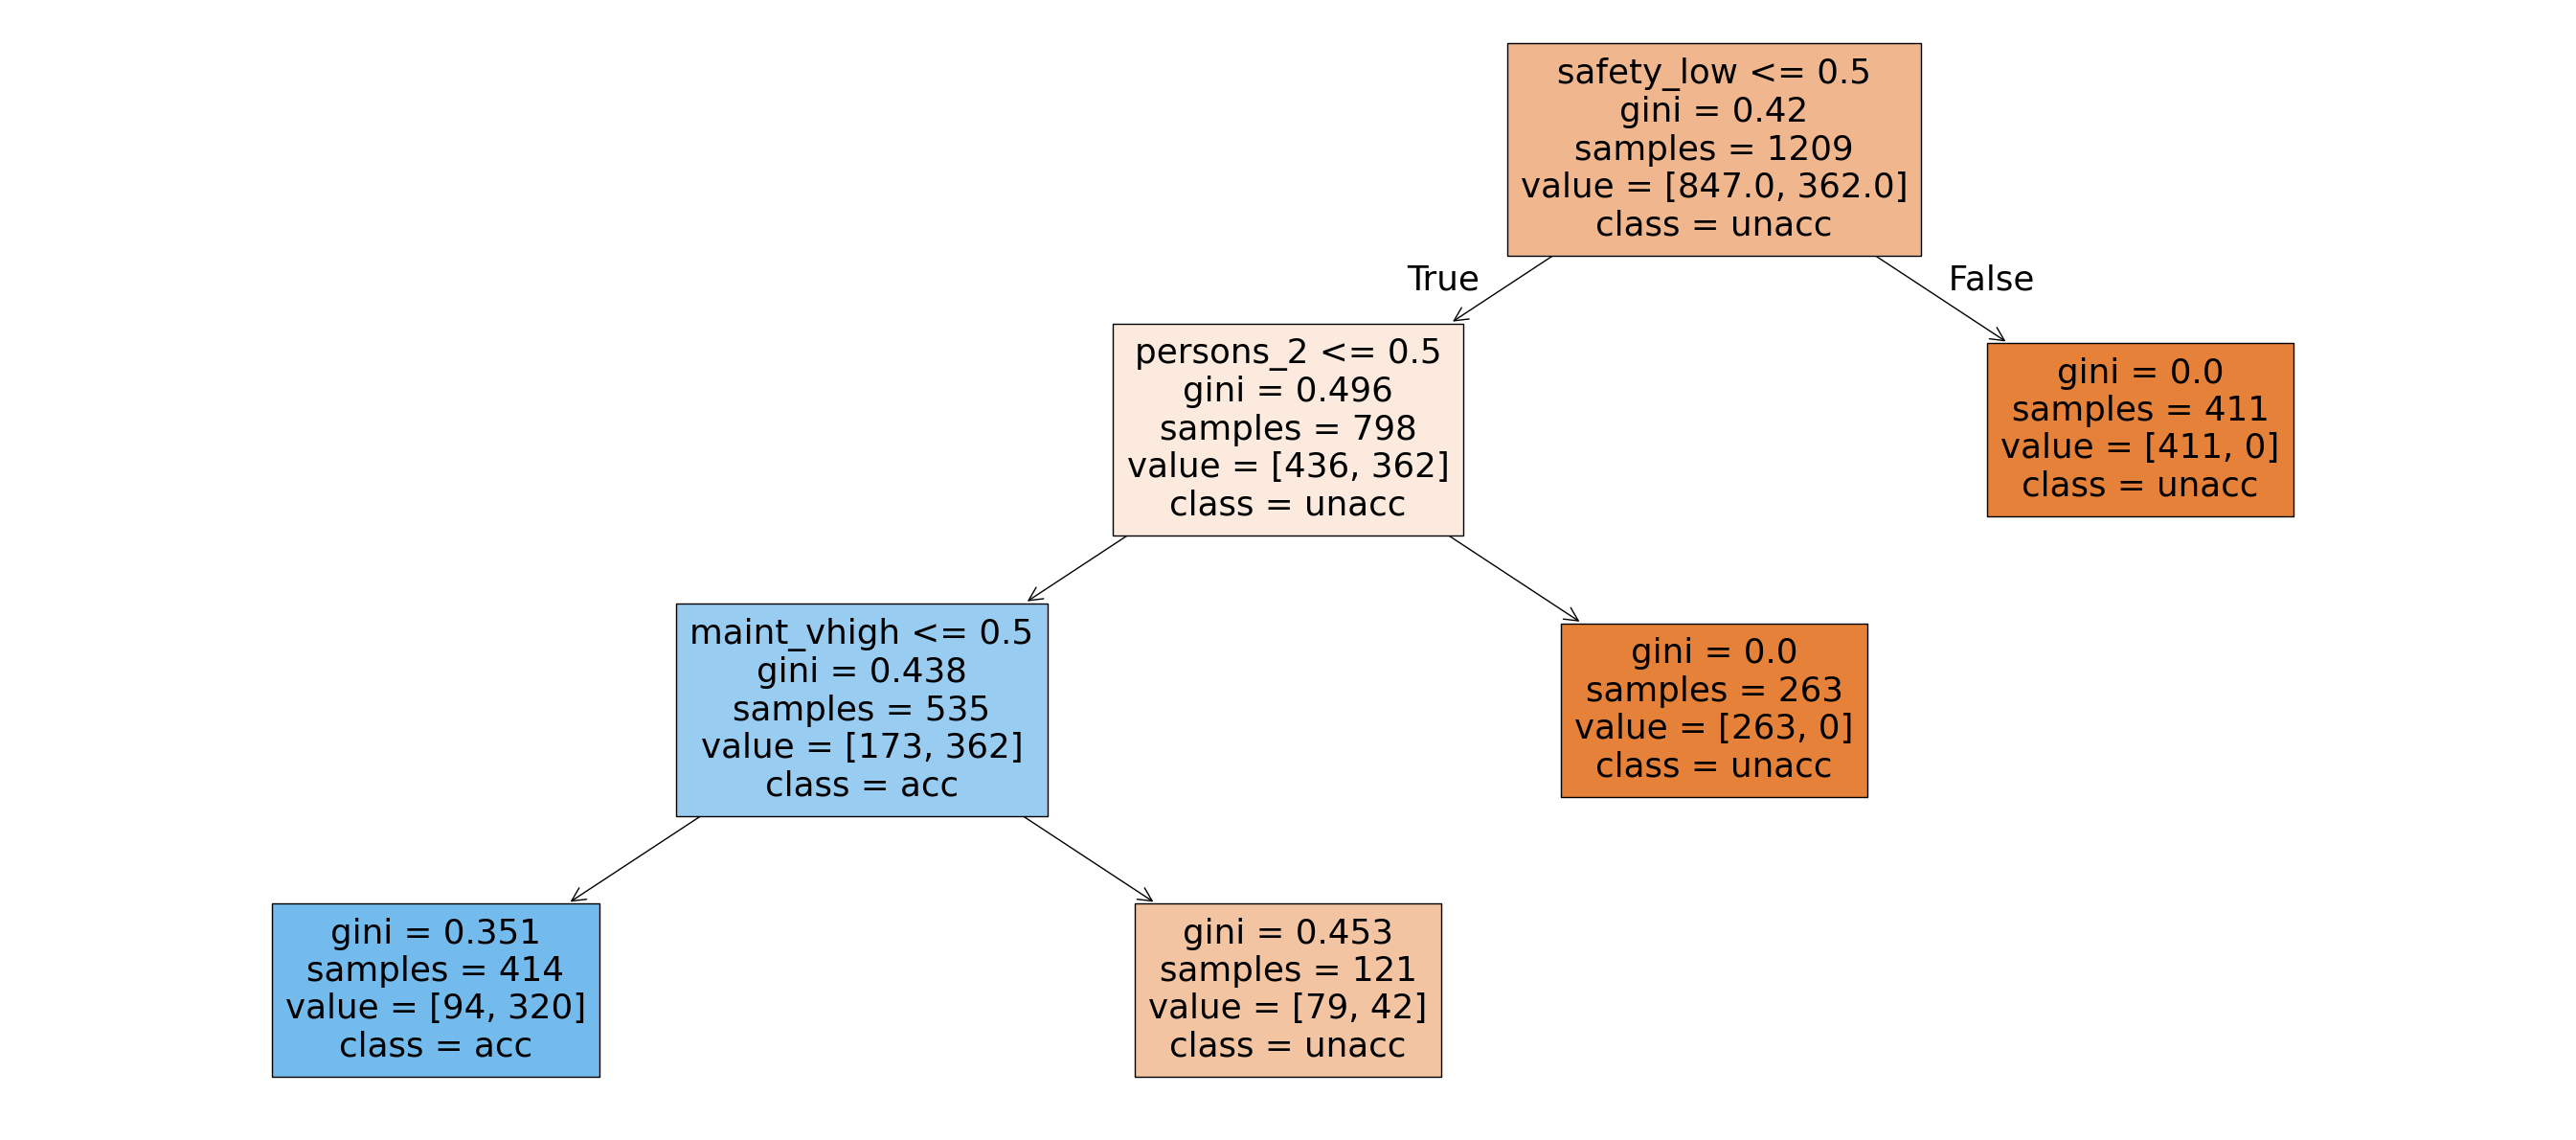

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- maint_vhigh <= 0.50
|   |   |   |--- class: True
|   |   |--- maint_vhigh >  0.50
|   |   |   |--- class: False
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False



In [49]:
## Loading the data and setting target and predictor variables
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

## Train-test split and fitting the tree
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree, feature_names = x_train.columns,  class_names = ['unacc', 'acc'],filled=True)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree, feature_names = x_train.columns.tolist()))

## 11. Advantages and Disadvantages

**Task 1**  
- Fit two decision trees to the dataset we’ve been working with:
    - `dtree1` with no restriction on the `max_depth`
    - `dtree2` with a `max_depth` of 7, on the training data
- Print the max_depth of each tree.

<br>

**Task 2**  
- Evaluate the accuracy of each tree on the test set.
- Does the tree with the greater depth or the tree with the lower depth have a higher accuracy?
- Remember, a larger depth does not always mean better accuracy, as it can lead to overfitting.

In [50]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

## 1. Two decision trees
dtree1 = DecisionTreeClassifier()
dtree2 = DecisionTreeClassifier(max_depth=7)

## Fit first decision tree
dtree1.fit(x_train, y_train)
dtree1_depth = dtree1.get_depth()
print(f'First Decision Tree depth: {dtree1_depth}')

## Fit second decision tree
dtree2.fit(x_train, y_train)
dtree2_depth = dtree2.get_depth()
print(f'Second Decision Tree depth: {dtree2_depth}')

## 2. Calculate accuracy scores on test data for both trees
dtree1_score = dtree1.score(x_test, y_test)
print(f'Test set accuracy tree no max depth: {dtree1_score}')# or accuracy_score(y_test, y_pred)

dtree2_score = dtree2.score(x_test, y_test)
print(f'Test set accuracy tree max depth 7: {dtree2_score}')# or accuracy_score(y_test, y_pred)

First Decision Tree depth: 11
Second Decision Tree depth: 7
Test set accuracy tree no max depth: 0.9788053949903661
Test set accuracy tree max depth 7: 0.9576107899807321
